In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
conn = sqlite3.connect('im.db')

In [122]:

directorsName = pd.read_sql("""
      SELECT DISTINCT primary_name, COUNT(primary_name), AVG(averagerating)
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id
      GROUP BY primary_name
      HAVING AVG(averagerating) > 8 AND COUNT(primary_name) > 15
      ORDER BY AVG(averagerating) DESC;     
              """,conn)

In [123]:
Final_df = pd.DataFrame(directorsName)
Final_df

,primary_name,COUNT(primary_name),AVG(averagerating)
0,Sylvia Broeckx,28,9.000000
1,Lisa Gossels,17,9.000000
2,Erin Korbylo,28,9.000000
3,Dennis Korbylo,28,9.000000
4,Anthony Russo,30,8.246667
5,Joe Russo,31,8.180645
6,Pauli Janhunen Calderón,23,8.152174
7,Jaco Van Dormael,16,8.106250


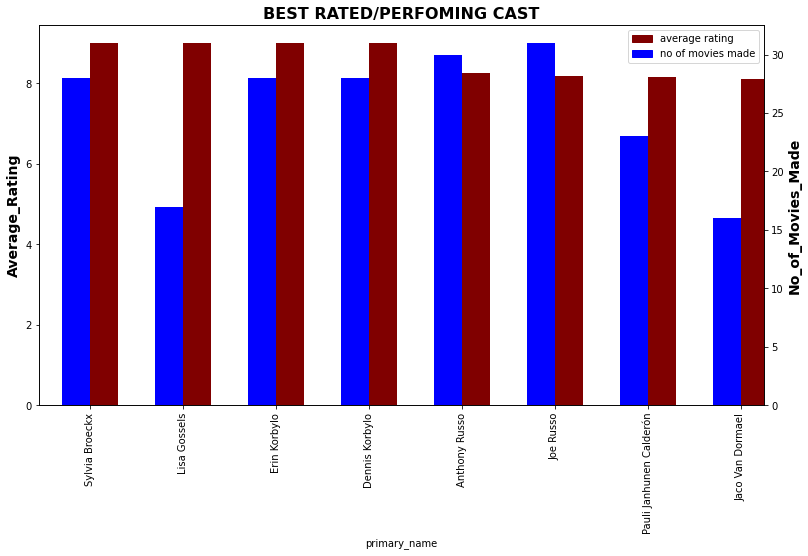

In [133]:
# This code creates a figure with a size of 13 inches by 7 inches using the figsize parameter in plt.figure().
#The ax = fig.add_subplot(111) line creates a single subplot (axes) in the figure with an index of 111

fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .3

plt.xticks(rotation=75, fontsize=10, fontweight= 'bold')
plt.title('BEST RATED/PERFOMING CAST', fontsize=16, fontweight='bold')
ax.set_ylabel('Average_Rating', fontsize=14, fontweight='bold')
ax2.set_ylabel('No_of_Movies_Made', fontsize=14, fontweight='bold')


gr['AVG(averagerating)'].plot(kind='bar',color='maroon',ax=ax,width=width, position=0)
gr['COUNT(primary_name)'].plot(kind='bar',color='blue', ax=ax2,width = width, position=1)


# Add the legend
plt.legend(handles=[maroon_patch, blue_patch])

plt.show()


